### EULER EXPLICIT : NOT WORKING METHOD
This code is referred to this site (including the variable change and the boundary conditions)
-> https://uma.ensta-paris.fr/labo/files/zidani/S1-1/Projets_2008.pdf

2.2176401615142822


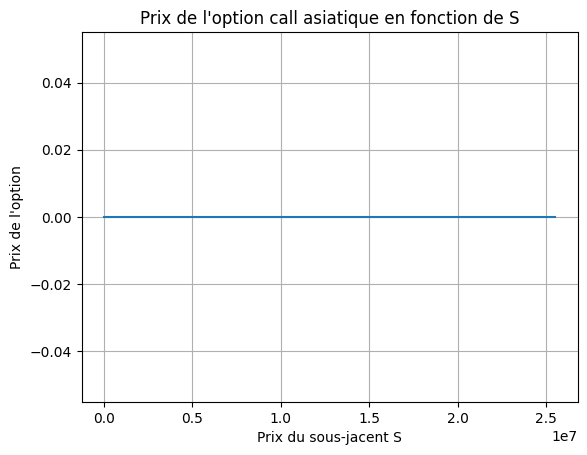

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# PARAMETERS
M = 100        # number of time steps
T = 1          # maturity
K = 220.0      # strike price of the option
S0 = 200.0     # initial price of the underlying asset
r = 0.035      # risk-free interest rate
sigma = 0.2    # volatility
N = 1000       # number of price grid points
dt = T / M     # time step for EDP resolution
Smax = 500     # maximum underlying asset price for resolution

Xmax = 10      
Xmin = -10
dx = (Xmax - Xmin) / N

# Initializing of Matrix and Vectors
C = np.zeros((M + 1, N + 1))
X = dx * np.arange(N + 1)
t = dt * np.arange(M + 1)

C[M, :] = np.maximum(-X, 0)
C[:, 0] = 0.0
C[:, N] = 0.0

# Matrix A for the implicit scheme
main_diag = -1 / dt - (sigma**2 * X[1:N]**2) / dx**2
upper_diag = 0.5 * (sigma**2 * X[2:N]**2 / dx**2) - ((1 / T + r * X[2:N]) / (2 * dx))
lower_diag = 0.5 * (sigma**2 * X[1:N-1]**2 / dx**2) + ((1 / T + r * X[1:N-1]) / (2 * dx))

A = np.diag(main_diag) + np.diag(upper_diag, 1) + np.diag(lower_diag, -1)

   
# on lance le chronomètre
start = time.time()
# boucle en temps
for i in range(M - 1, -1, -1):

    b = -1.0 / dt * C[i + 1, 1:N]

    b[0] += 0.5 * (sigma / dx)**2 * X[1]**2 * C[i, 0]
    b[N - 2] += (0.5 * (sigma / dx)**2 * X[N - 1]**2 - (1 / T + r * X[N - 1]) / dx) * C[i, N]

    C[i, 1:N] = np.linalg.solve(A, b)
    # garantir que les prix restent non négatifs
    #C[i, 1:N] = np.maximum(C[i, 1:N], 0)
end = time.time()
print(end - start)
S = K / np.maximum(X, 1e-5)  # Avoid division by zero or negative x


# Affichage des résultats
plt.plot(S, S0*C[0,:])
plt.xlabel('Prix du sous-jacent S')
plt.ylabel('Prix de l\'option')
plt.title('Prix de l\'option call asiatique en fonction de S')
plt.grid(True)
plt.show()


In [2]:
S0_to_see = S0
index_approx_200 = np.argmin(np.abs(S - S0_to_see))  # Trouve l'indice proche de 200
print(f"Index at S ~ 200  : {index_approx_200}")
print(f"Value of S at this index : {S[index_approx_200]}")
print(f"The value of the option is : ", S0*C[0,index_approx_200])

Index at S ~ 200  : 51
Value of S at this index : 250.0
The value of the option is :  -0.0
